1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


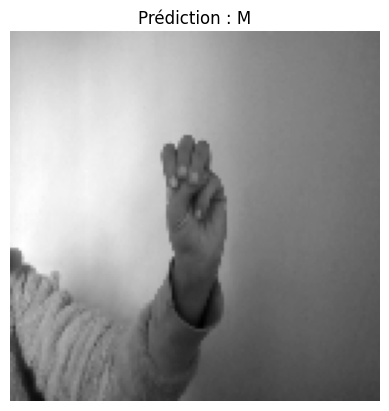

La classe prédite est : M


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Charger le modèle préalablement sauvegardé
model = tf.keras.models.load_model('hand_sign_language_model2.h5')

# Charger l'image à tester
# img_path = r'\model_cNN\test_data\M\87.png'  # Remplacez par le chemin vers votre image
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')

# Convertir l'image en tableau numpy
img_array = image.img_to_array(img)

# Ajouter une dimension pour les lots (batch size)
img_array = np.expand_dims(img_array, axis=0)

# Normaliser l'image comme pour les données d'entraînement
img_array = img_array / 255.0

# Charger les données des labels
y_labels = np.load("y_labels2.npy")

# Convertir les labels en indices numériques
label_map = {label: idx for idx, label in enumerate(np.unique(y_labels))}
inv_label_map = {idx: label for label, idx in label_map.items()}

# Utiliser le modèle pour faire une prédiction
predictions = model.predict(img_array)

# Récupérer la classe prédite
predicted_class = np.argmax(predictions, axis=1)

# Convertir la classe prédite en étiquette
predicted_label = inv_label_map[predicted_class[0]]

# Afficher l'image et la classe prédite
plt.imshow(img, cmap='gray')
plt.title(f"Prédiction : {predicted_label}")
plt.axis('off')
plt.show()

# Afficher la prédiction
print(f"La classe prédite est : {predicted_label}")


Reel time prediction with camera

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Charger le modèle préalablement sauvegardé
model = tf.keras.models.load_model('hand_sign_language_model2.h5')

# Charger Vos données prétraitées et les labels
# X = np.load("X_preprocessed.npy")
# y = np.load("y_labels.npy")

# Convertir les labels en indices numériques
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
inv_label_map = {idx: label for label, idx in label_map.items()}

# Ouvrir la webcam
cap = cv2.VideoCapture(0)

while True:
    # Lire une image depuis la webcam
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convertir l'image en niveaux de gris
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Redimensionner l'image à 128x128 (taille d'entrée du modèle)
    resized_frame = cv2.resize(gray_frame, (128, 128))
    
    # Ajouter une dimension pour le batch et normaliser l'image
    img_array = resized_frame.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # Ajouter la dimension des canaux
    img_array = np.expand_dims(img_array, axis=0)   # Ajouter la dimension du batch
    
    # Faire une prédiction
    predictions = model.predict(img_array)
    
    # Obtenir la classe prédite
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = inv_label_map[predicted_class[0]]
    
    # Afficher la prédiction sur l'image
    cv2.putText(frame, f"Predicted: {predicted_label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Afficher l'image avec la prédiction
    cv2.imshow("Real-Time Prediction", frame)
    
    # Quitter la boucle si la touche 'q' est pressée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la caméra et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()
